In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers.recurrent import LSTM
from keras.layers import Dropout
from keras.preprocessing import sequence
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
path_data_dir = 'data/original/'
path_save_dir = 'data/normalization/'
if not os.path.exists(path_save_dir):
    os.makedirs(path_save_dir)

path_action_dir = os.path.join(path_data_dir, "ans/")
path_point_dir = os.path.join(path_data_dir, "cordinate/")
file_names = ['fall','sitdown', 'standup','test']
data_file_names = [file_name + '.csv' for file_name in file_names]

In [3]:
columuns=["frame_num","Nose_x","Nose_y","Neck_x","Neck_y","RShoulder_x","RShoulder_y","RElbow_x","RElbow_y","RWrist_x","RWrist_y",
                 "LShoulde_x","LShoulde_y","LElbow_x","LElbow_y","LWrist_x","LWrist_y","RHip_x","RHip_y","RKnee_x","RKnee_y",
                 "RAnkle_x","RAnkle_y","LHip_x","LHip_y","LKnee_x","LKnee_y","LAnkle_x","LAnkle_y","REye_x","REye_y","LEye_x",
                 "LEye_y","REar_x","REar_y","LEar_x","LEar_y"]

Nan埋め・正規化

In [13]:
for data_file_name in data_file_names:
    print(data_file_name)
    path_data = os.path.join(path_point_dir, data_file_name)
    data_df=pd.read_csv(path_data)
    data_df.columns=["frame_num","Nose_x","Nose_y","Neck_x","Neck_y","RShoulder_x","RShoulder_y","RElbow_x","RElbow_y","RWrist_x","RWrist_y",
                 "LShoulde_x","LShoulde_y","LElbow_x","LElbow_y","LWrist_x","LWrist_y","RHip_x","RHip_y","RKnee_x","RKnee_y",
                 "RAnkle_x","RAnkle_y","LHip_x","LHip_y","LKnee_x","LKnee_y","LAnkle_x","LAnkle_y","REye_x","REye_y","LEye_x",
                 "LEye_y","REar_x","REar_y","LEar_x","LEar_y"]
    frame_num=data_df.count()[0]
    data_df=data_df.drop("frame_num",axis=1)
    data_df = data_df.fillna(method="ffill")
    data_df = data_df.fillna(method="bfill")
    x_data=["Nose_x","Neck_x","RShoulder_x","RElbow_x","RWrist_x","LShoulde_x","LElbow_x","LWrist_x","RHip_x","RKnee_x",
        "RAnkle_x","LHip_x","LKnee_x","LAnkle_x","REye_x","LEye_x","REar_x","LEar_x"]
    y_data=["Nose_y","Neck_y","RShoulder_y","RElbow_y","RWrist_y","LShoulde_y","LElbow_y","LWrist_y","RHip_y",
            "RKnee_y","RAnkle_y","LHip_y","LKnee_y","LAnkle_y","REye_y","LEye_y","REar_y","LEar_y"]
    df_new=data_df.copy()
    for i in range(frame_num):
        df_new_data=df_new.iloc[i]
        x_max=df_new_data[x_data].max()
        x_min=df_new_data[x_data].min()
        y_max=df_new_data[y_data].max()
        y_min=df_new_data[y_data].min()
        df_new_data[x_data]=df_new_data[x_data].apply(lambda x:(x-x_min)/(x_max-x_min))
        df_new_data[y_data]=df_new_data[y_data].apply(lambda y:(y-y_min)/(y_max-y_min))
    path_file=os.path.join(path_save_dir,data_file_name)
    df_new.to_csv(path_file)
    

fall.csv
sitdown.csv
standup.csv
test.csv


データ加工

In [14]:
path_n_data="data/normalization/"

In [15]:
fall=pd.read_csv(path_n_data+data_file_names[0])
sitdown=pd.read_csv(path_n_data+data_file_names[1])
standup=pd.read_csv(path_n_data+data_file_names[2])
test=pd.read_csv(path_n_data+data_file_names[3])

fall_action=pd.read_csv(path_action_dir+data_file_names[0])
sitdown_action=pd.read_csv(path_action_dir+data_file_names[1])
standup_action=pd.read_csv(path_action_dir+data_file_names[2])
test_action=pd.read_csv(path_action_dir+data_file_names[3])

In [17]:
print(sitdown.isna().values.sum()!=0)

False


In [18]:
sitdown

,Unnamed: 0,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,...,LAnkle_x,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y
0,0,0.597561,0.054348,0.317073,0.108696,0.317073,0.130435,0.365854,0.336957,0.500000,...,0.024390,0.989130,0.585366,0.021739,1.000000,0.065217,0.487805,0.000000,0.951220,0.152174
1,1,0.604938,0.054348,0.320988,0.108696,0.320988,0.130435,0.345679,0.336957,0.481481,...,0.061728,0.978261,0.592593,0.021739,1.000000,0.065217,0.493827,0.000000,0.950617,0.152174
2,2,0.607595,0.064516,0.316456,0.107527,0.303797,0.129032,0.329114,0.333333,0.468354,...,0.101266,0.978495,0.594937,0.032258,1.000000,0.064516,0.493671,0.000000,0.949367,0.150538
3,3,0.594937,0.065934,0.329114,0.109890,0.303797,0.120879,0.329114,0.329670,0.443038,...,0.088608,0.978022,0.594937,0.032967,1.000000,0.054945,0.506329,0.000000,0.949367,0.142857
4,4,0.589744,0.065934,0.333333,0.098901,0.307692,0.120879,0.307692,0.329670,0.423077,...,0.141026,0.989011,0.589744,0.043956,1.000000,0.054945,0.500000,0.000000,0.948718,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,600,0.510638,0.020833,0.531915,0.187500,0.255319,0.187500,0.000000,0.333333,0.127660,...,0.765957,0.979167,0.468085,0.000000,0.574468,0.000000,0.382979,0.020833,0.680851,0.020833
601,601,0.500000,0.042553,0.541667,0.191489,0.250000,0.191489,0.000000,0.340426,0.145833,...,0.750000,1.000000,0.458333,0.000000,0.562500,0.000000,0.375000,0.042553,0.666667,0.042553
602,602,0.510204,0.021739,0.551020,0.173913,0.285714,0.173913,0.000000,0.326087,0.142857,...,0.755102,1.000000,0.469388,0.000000,0.571429,0.000000,0.387755,0.021739,0.673469,0.021739
603,603,0.510204,0.043478,0.530612,0.195652,0.265306,0.173913,0.000000,0.304348,0.122449,...,0.714286,1.000000,0.469388,0.000000,0.551020,0.000000,0.367347,0.021739,0.673469,0.043478


In [59]:
labels=pd.read_csv("data/labels_num.csv")
labels

,action_gt_name,action_gt_num
0,stand,0
1,fall,1
2,sittingdown,2
3,standingup,3
4,sitdown,4


In [60]:
df_train_point=pd.concat([fall,sitdown,standup])
df_train_action=pd.concat([fall_action,sitdown_action,standup_action])
df_test_point=test
df_test_action=test_action

In [61]:
X_train=df_train_point.drop("Unnamed: 0",axis=1)
y_train=df_train_action
X_test=df_test_point.drop("Unnamed: 0",axis=1)
y_test=df_test_action

In [62]:
y_test_label=y_test

In [63]:
X_train.describe()

,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y,...,LAnkle_x,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y
count,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,...,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000
mean,0.450548,0.220739,0.468283,0.258965,0.340056,0.271581,0.295134,0.465740,0.341879,0.597705,...,0.657434,0.972994,0.404433,0.178805,0.369877,0.208245,0.428703,0.090566,0.528144,0.094439
std,0.268407,0.251348,0.221406,0.139195,0.281760,0.155426,0.317378,0.172558,0.351689,0.179879,...,0.292879,0.043554,0.311084,0.232014,0.275514,0.253582,0.304634,0.141641,0.260834,0.156144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234043,0.030303,0.301587,0.157895,0.146341,0.166667,0.036364,0.340426,0.031746,0.486842,...,0.512821,0.968254,0.133333,0.000000,0.102564,0.000000,0.158730,0.000000,0.315789,0.000000
50%,0.431034,0.085714,0.489362,0.194444,0.237288,0.204545,0.174603,0.396226,0.163934,0.526316,...,0.707317,0.985714,0.389831,0.023810,0.393939,0.083333,0.337838,0.031746,0.577465,0.025000
75%,0.561404,0.371429,0.586957,0.352941,0.571429,0.394737,0.520000,0.612245,0.650000,0.666667,...,0.870370,1.000000,0.585366,0.357143,0.534884,0.357143,0.687500,0.065217,0.679245,0.064516
max,1.000000,1.000000,1.000000,0.666667,1.000000,0.743590,1.000000,0.875000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.820000,1.000000,0.980000,1.000000,0.888889,1.000000,0.826667


In [64]:
print(X_test.isna().values.sum()!=0)

False


In [65]:
X_test.describe()

,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y,...,LAnkle_x,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,...,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.469455,0.149515,0.610072,0.258708,0.425865,0.255106,0.308783,0.435768,0.342257,0.552499,...,0.617065,0.963477,0.379889,0.064077,0.477731,0.062861,0.265758,0.103799,0.635812,0.126762
std,0.215765,0.190731,0.192445,0.165323,0.285966,0.172152,0.336518,0.197279,0.282933,0.256395,...,0.384025,0.061696,0.212008,0.122559,0.204159,0.110247,0.222801,0.182394,0.202914,0.187220
min,0.000000,0.013514,0.269231,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,...,0.023256,0.735294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.000000
25%,0.351852,0.027778,0.456522,0.166667,0.155556,0.156250,0.000000,0.342857,0.106383,0.428571,...,0.121212,0.959184,0.218750,0.000000,0.324324,0.000000,0.000000,0.014925,0.490566,0.021739
50%,0.476190,0.043478,0.566667,0.183673,0.320000,0.183673,0.125000,0.367347,0.222222,0.492754,...,0.772727,1.000000,0.348837,0.000000,0.477273,0.000000,0.259259,0.031250,0.658537,0.040000
75%,0.692308,0.254545,0.747126,0.234375,0.701149,0.236364,0.682353,0.569231,0.581818,0.659574,...,1.000000,1.000000,0.500000,0.048780,0.620000,0.058824,0.375000,0.088889,0.826087,0.106061
max,0.984615,0.690909,1.000000,0.745455,0.969697,0.745455,1.000000,0.909091,1.000000,1.000000,...,1.000000,1.000000,0.814815,0.511628,0.836364,0.454545,0.953846,0.651163,0.981818,0.666667


In [66]:
from keras.utils import to_categorical

In [67]:
X_test = np.array(X_test)
zeros  = np.zeros((X_train.shape[0] - X_test.shape[0], X_train.shape[1]))
X_test = np.append(X_test, zeros, axis = 0)
X_test = pd.DataFrame(X_test)

y_test = np.array(y_test)
zeros  = np.zeros((y_train.shape[0] - y_test.shape[0], y_train.shape[1]))
y_test = np.append(y_test, zeros, axis = 0)
y_test = pd.DataFrame(y_test)

In [68]:
X_train = np.reshape(X_train.values, [1, X_train.shape[0], X_train.shape[1]])
y_train = np.reshape(np.array(to_categorical(y_train)), [1, y_train.shape[0], 5])
X_test  = np.reshape(X_test.values, [1, X_test.shape[0], X_test.shape[1]])
y_test  = np.reshape(np.array(to_categorical(y_test)), [1, y_test.shape[0], 5])

In [31]:
BATCHSIZE = 32
EPOCHS    = 100
UNITNUM   = 50
optimizer = RMSprop()
model = Sequential()
model.add(LSTM(UNITNUM, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(5))
model.add(Activation("softmax"))
model.compile(loss = "mean_squared_error", optimizer = optimizer, metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2785, 50)          17400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2785, 50)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 2785, 5)           255       
_________________________________________________________________
activation_1 (Activation)    (None, 2785, 5)           0         
Total params: 17,655
Trainable params: 17,655
Non-trainable params: 0
_________________________________________________________________


In [32]:
y_train

array([[[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]], dtype=float32)

In [33]:
history = model.fit(X_train, y_train, batch_size = BATCHSIZE, epochs = EPOCHS)
modelName = model.__class__.__name__

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.1667 - accuracy: 0.1232
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.1535 - accuracy: 0.3375
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.1457 - accuracy: 0.4212
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.1401 - accuracy: 0.4894
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.1344 - accuracy: 0.5415
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.1298 - accuracy: 0.5756
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.1245 - accuracy: 0.5799
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 0.1222 - accuracy: 0.5623
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: 0.1276 - accuracy: 0.5174
Epoch 10/100
1/1 [==============================] - 1s 1s/step - loss: 0.1183 - accuracy: 0.5587
Epoch 11/100
1/1 [=====================

In [70]:
y_predicted = model.predict(X_test)
score=model.evaluate(X_test,y_test)
score[0] #score
score[1] #accuracy

1/1 [==============================] - 1s 713ms/step


0.1874326765537262

In [57]:
y_test.shape

(1, 981, 5)

In [35]:
y_predicted = np.reshape(y_predicted, (X_train.shape[1], 5))
y_predicted = pd.DataFrame(y_predicted)
y_predicted = y_predicted.idxmax(axis = 1)

In [36]:
trueLabel      = y_test_label.values
predictedLabel = y_predicted.values
predictedLabel = predictedLabel[:y_test.shape[1]]

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
y_test.shape[1]
predictedLabel

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Text(30.5, 0.5, 'trueLabel')

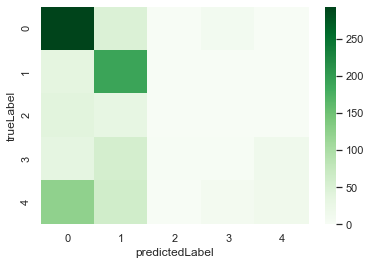

In [39]:
cm = confusion_matrix(trueLabel, predictedLabel)
sns.heatmap(cm, cbar = True, cmap = 'Greens')
plt.xlabel('predictedLabel')
plt.ylabel('trueLabel')

In [40]:
cm

array([[293,  49,   0,  10,   0],
       [ 37, 191,   0,   0,   0],
       [ 41,  33,   0,   0,   0],
       [ 36,  58,   3,   3,  17],
       [124,  62,   0,   9,  15]], dtype=int64)

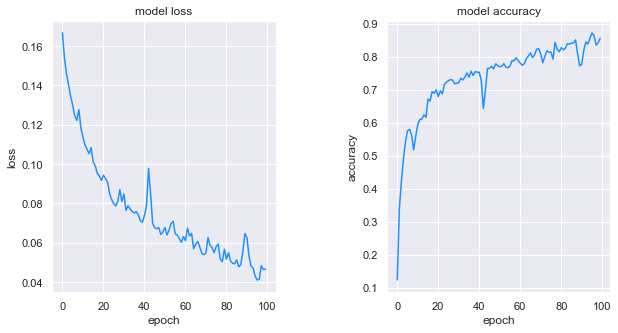

In [53]:
def plot_history_loss(fit):
    axL.plot(fit.history['loss'], label = "for training", color = 'dodgerblue')
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
def plot_history_accuracy(fit):
    axR.plot(fit.history['accuracy'], label = "for training", color = 'dodgerblue')
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')

fig, (axL, axR) = plt.subplots(ncols = 2, figsize = (10,5))
plt.subplots_adjust(wspace = 0.5)
plot_history_loss(history)
plot_history_accuracy(history)

In [52]:
history.history

{'loss': [0.16668860614299774,
  0.15352992713451385,
  0.145699605345726,
  0.14008140563964844,
  0.13436704874038696,
  0.1298084557056427,
  0.12448693066835403,
  0.12224525213241577,
  0.12761060893535614,
  0.11832114309072495,
  0.11367621272802353,
  0.10964865982532501,
  0.107448510825634,
  0.10527314245700836,
  0.10837039351463318,
  0.10094556212425232,
  0.09906594455242157,
  0.09521391242742538,
  0.09390605986118317,
  0.0916629359126091,
  0.0943085104227066,
  0.09262359887361526,
  0.09093721956014633,
  0.08493529260158539,
  0.08202493190765381,
  0.07984454184770584,
  0.07867185026407242,
  0.08104252070188522,
  0.08698190003633499,
  0.08094720542430878,
  0.08472415804862976,
  0.07648341357707977,
  0.07879754900932312,
  0.07715494930744171,
  0.07590092718601227,
  0.07511137425899506,
  0.07576581835746765,
  0.07421238720417023,
  0.07116417586803436,
  0.07041569799184799,
  0.07386481016874313,
  0.07879367470741272,
  0.09773267805576324,
  0.084838